# Simuleer NVO's in 1D dwarsprofielen D-hydro

Deze notebook runt het .py bestand dat in de scripts map staat. Dit .py bestand wordt geimporteerd met de aanname dat het script in één folder hoger zit dan de huidige notebook. Als het script niet werkt, check dan eerst of dit klopt.

Het script simuleert in de geselecteerde dwarsprofielen een natuurvriendelijke oever (NVO) met de gekozen breedte en ruwheid. Hierbij wordt de NVO geschematiseerd met behulp van frictie in het 'on lane' principe. Het groene bakje krijgt over een bepaalde breedte van het dwarsprofiel een hoge weerstand, het overgebleven blauwe bakje (doorstroomprofiel) krijgt een (lagere) andere weerstand (zie afbeelding hieronder)

* `mdu_path` : Path()
        Path to mdu file containing the D-hydro model structure
* `shape_path`: str
        Path to shape containing polygon areas in which friction of cross sections should be adjusted
* `column_waterlevel` : str
        Column in the shapefile that describes the waterlevel with which the water width/line should be calculated
* `width_embak`: double
        Width (meters) of the natural embankment, measured at the waterline
* `friction_type`: str or int
        Choice between Chezy, Manning, Strickler, deBosBijkerk (standard is Strickler) 
        Chezy - 0
        Manning - 1
        WallLawNikuradse - 2
        WhiteColebrook - 3
        StricklerNikuradse - 7
        Strickler - 8
        deBosBijkerk - 9
* `mbank_friction`  double
        friction value with which you want the schematisize the natural embankment
* `ormal_friction` : double
        friction value with which you want the schematisize the remaining cross section (flow area)
* `side` : str
        Choose either "left" or "right"
 
Opmerkingen:
- Hydrolib dient in python geïnstalleerd te zijn (open prompt, pip install hydrolib-core)

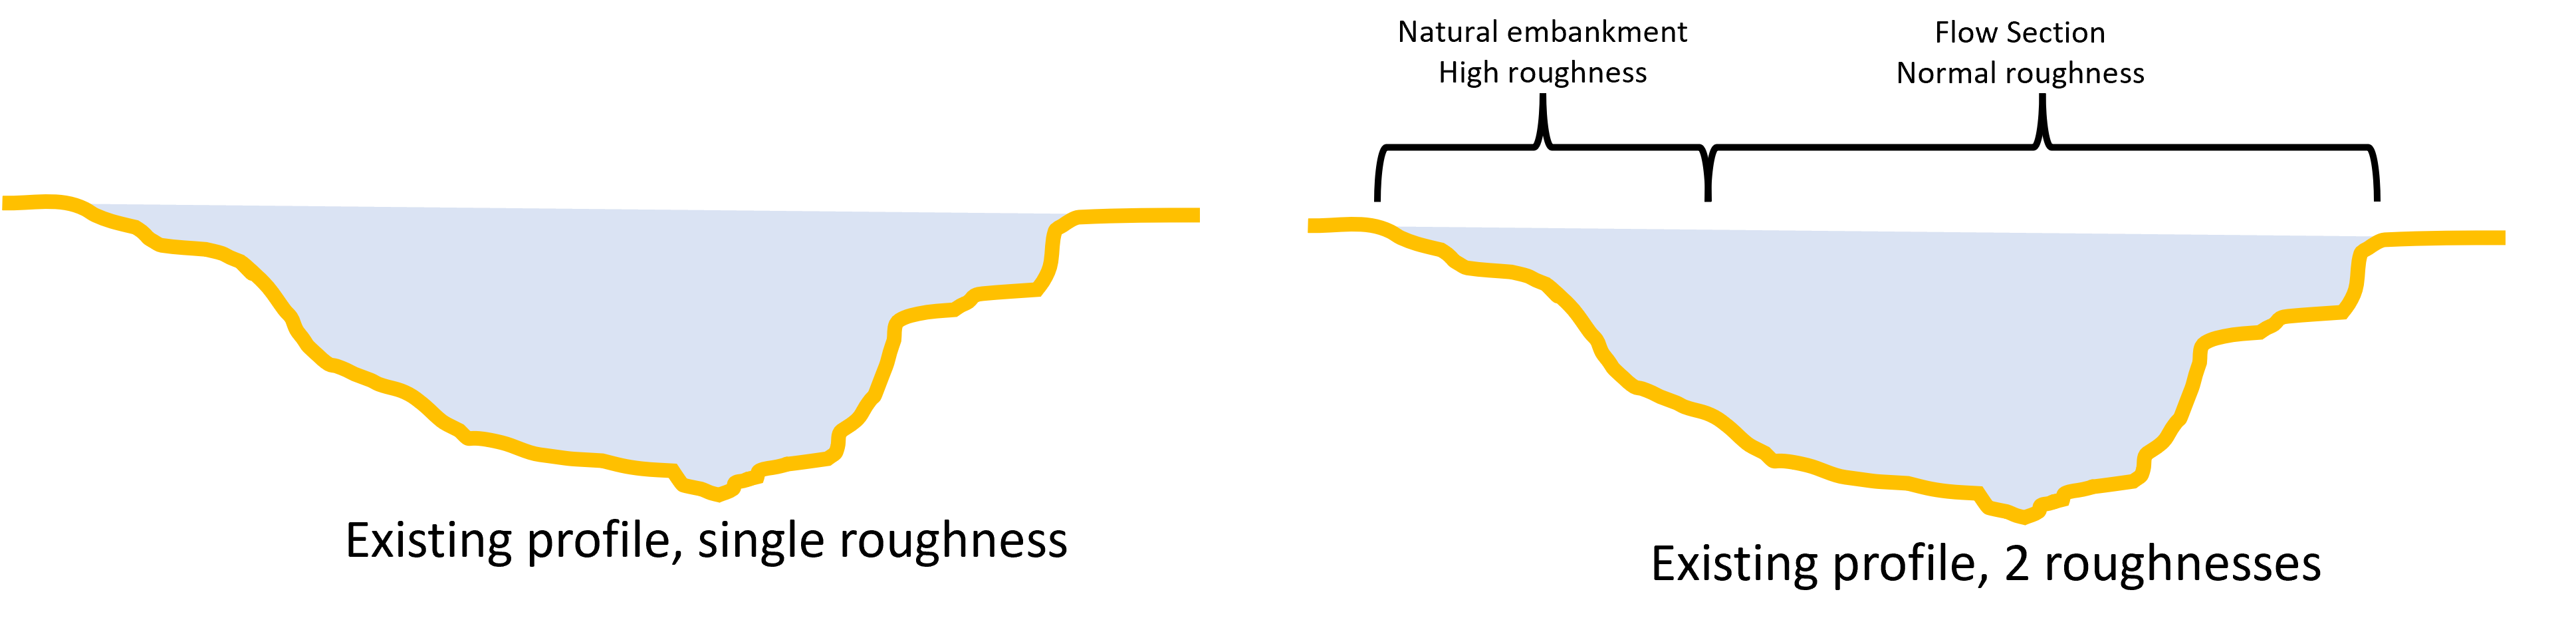

## Importeer het benodigde script: Run onderstaande cel

In [1]:
import os 
import sys
from pathlib import Path
currentdir = os.path.dirname(os.path.abspath(''))
sys.path.insert(0,currentdir) 

from natural_embankment_crs_friction import natural_embankment_crs_friction

## Definieer de inputs: Pas deze hieronder aan en run de cel

In [3]:
mdu_path = Path(os.path.join(currentdir, r"exampledata\Dellen\Model_cleaned\dflowfm\Flow1D.mdu"))
shape_path = Path(os.path.join(currentdir,r"exampledata\Dellen\GIS\nvo_test.shp"))
column_waterlevel = "wl"
width_embak = 4
friction_type = "Strickler"
embank_friction = 1
normal_friction = 30
side = "left"

## Run het script

In [4]:
natural_embankment_crs_friction(mdu_path, shape_path, column_waterlevel, width_embak, friction_type, embank_friction, normal_friction, side)

Load input data
Amersfoort aangenomen als projectie
no 1d2d links in model
Aangenomen dat alle lijnen watergangen zijn, branches.gui is leeg.
Did not have to split shared definitions for the selected profile loctions
Find the parameters for the friction sections
Writing embankment height and waterlevels for each cross section
Progress 0.0%
Write cross section definition data
Write cross section location data
Write friction files
Write MDU file


# Output
Als output van deze functie worden in het opgegeven model (waar de mdu-file was van opgegeven) de volgende bestanden geupdate: crsdef.ini, crsloc.ini, mdu-file en friction files